In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Data_from.csv',encoding='cp1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5298,ham,I.ll hand her my phone to chat wit u,NaN,NaN,NaN
2486,ham,I dont thnk its a wrong calling between us,NaN,NaN,NaN
5337,ham,My birthday is on feb &lt;#&gt; da. .,NaN,NaN,NaN
1785,ham,I dun believe u. I thk u told him.,NaN,NaN,NaN
1945,ham,Can Ì_ call me at 10:10 to make sure dat i've ...,NaN,NaN,NaN


Data Claning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [5]:
df.sample(5)


,v1,v2
1431,ham,My painful personal thought- \I always try to ...
1946,ham,Hey we can go jazz power yoga hip hop kb and y...
1239,ham,Hope you are having a great new semester. Do w...
1263,ham,Ok. No wahala. Just remember that a friend in ...
1648,ham,If u laugh really loud.. If u talk spontaneous...


In [6]:
# Rename columns
df.rename(columns={'v1':'label','v2':'text'}, inplace=True)
df.sample(5)

,label,text
1410,ham,Pls speak to that customer machan.
1743,ham,I love to wine and dine my lady!
1781,ham,";-( oh well, c u later"
2486,ham,I dont thnk its a wrong calling between us
2498,ham,"I know where the &lt;#&gt; is, I'll be there..."


In [7]:
# Check for null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [131]:
# Check for duplicates
df.duplicated().sum()

np.int64(403)

In [9]:
df.drop_duplicates(inplace=True,keep='first')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [11]:
df['label']=le.fit_transform(df['label'])
df.sample(5)

,label,text
5500,0,Love has one law; Make happy the person you lo...
4320,0,"K, jason says he's gonna be around so I'll be ..."
4324,0,Am only searching for good dual sim mobile pa.
4478,0,Erutupalam thandiyachu
2471,0,"sry can't talk on phone, with parents"


<h1> EDA

In [12]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [13]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

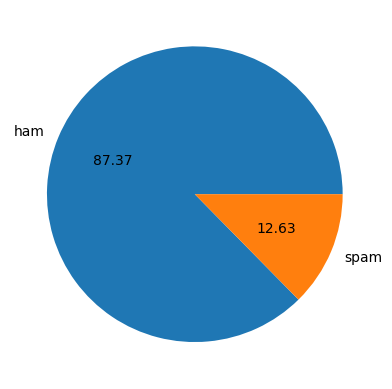

In [14]:
# %pip install matplotlib
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [15]:
# Data is imbalanced, so we will use SMOTE to balance it
# %pip install imblearn
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# number odf characters in each message
df['text'].apply(len)


0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [17]:
df['num_characters']=df['text'].apply(len)
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\sande/nltk_data'
    - 'c:\\Users\\sande\\Desktop\\Machine_Learning_Project\\Movie_Recommnder_System_Project\\.movies\\nltk_data'
    - 'c:\\Users\\sande\\Desktop\\Machine_Learning_Project\\Movie_Recommnder_System_Project\\.movies\\share\\nltk_data'
    - 'c:\\Users\\sande\\Desktop\\Machine_Learning_Project\\Movie_Recommnder_System_Project\\.movies\\lib\\nltk_data'
    - 'C:\\Users\\sande\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
